In [1]:
import pandas as pd
import seaborn as sns

In [2]:
actual_m = 10
actual_c = 20

x = [1, 2, 3, 4, 5]
y = [actual_m * i + actual_c for i in x]
y

# x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# y = [2, 1, 2, 1, 7, 6, 7, 6, 12, 11, 12, 11]

x = [1, 1, 1, 2, 2, 2, 3, 3, 3,  5, 5, 5, 6,6, 6, 7,7, 7,  9, 9, 9, 10, 10, 10, 11, 11, 11]
y = [2, 1.5, 1.1, 2, 1.5, 1, 2, 1.5, 1,  7, 6.5, 6, 7, 6.5, 6, 7, 6.5, 6,  12, 11.5, 11, 12, 11.5, 11, 12, 11.5, 11]

Text(0, 0.5, 'Y')

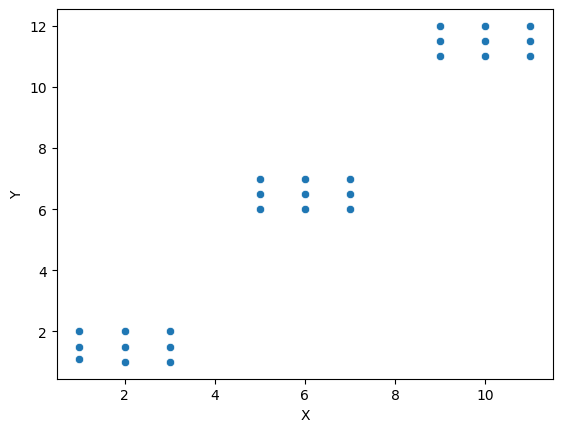

In [3]:
ax = sns.scatterplot(x=x, y=y)
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [4]:
y_mean = sum(y)/len(y)
y_mean

6.503703703703703

In [5]:
m = 0 # random guess
c = 0 # random guess

In [6]:
iterations = 1000

In [7]:
N = len(x)
N

27

In [8]:
L = 0.001 # learning rate

In [9]:
def forward():
    return [m * i + c for i in x]

In [10]:
def loss_fn(y_pred):
    return (1 / N) * sum( (y[i] - y_pred[i]) ** 2 for i in range(N) )

In [11]:
def r2_score(y_pred):
    rss = sum( (y[i] - y_pred[i])**2 for i in range(N) )
    tss = sum( (y[i] - y_mean)**2 for i in range(N) )
    r2 = 1 - rss/tss 
    return r2

In [12]:
def gradient_m(y_pred):
    return (-2 / N) * sum( ( x[i] * (y[i] - y_pred[i]) ) for i in range(N) )

In [13]:
def gradient_c(y_pred):
    return (-2 / N) * sum( (y[i] - y_pred[i]) for i in range(N) )

In [14]:
steps_data = []
accuracy_data = []

In [15]:
for i in range(1, iterations+1):
    steps_data.append(i)
    y_pred = forward()
    loss = loss_fn(y_pred)
    accuracy = r2_score(y_pred)
    accuracy_data.append(accuracy)
    # print("Loss:", loss, "| Accuracy:", accuracy)

    grad_m = gradient_m(y_pred)
    grad_c = gradient_c(y_pred)
    # print("gradient of m:", grad_m, "| graident of c:", grad_c)

    m = m - L * grad_m
    c = c - L * grad_c
    # print("m:", m, "| c:", c)
    # print()

In [16]:
df = pd.DataFrame({"Iteration": steps_data, "Accuracy": accuracy_data})

<Axes: xlabel='Iteration', ylabel='Accuracy'>

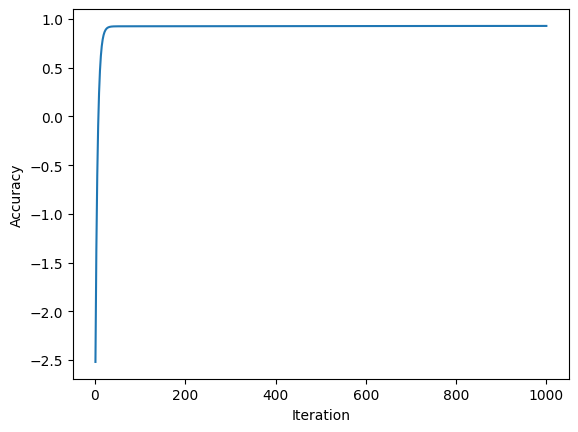

In [17]:
sns.lineplot(df, x= "Iteration", y="Accuracy")

In [19]:
m, c

(1.1204590846513611, -0.11847322643445737)